# Gradient Descent

We know that if $f:\mathbb{R}^d\to \mathbb{R}$ is convex (and twice continuously differentiable), then the global minimizers of $f$ are precisely the points $\mathbf{x}\in \mathbb{R}^d$ such that
$$
\nabla f(\mathbf{x}) = \boldsymbol{0}.
$$ Moreover, if $f$ is $\rho$-strongly convex for some $\rho>0$ then there such points are **unique** or if 
$$
H_f(\mathbf{x}) \text{ is positive definite}
$$ then such a point is unique.

The natural question is ***How do we numerically find these points?***
One answer turns out to be a relatively simple algorithm called gradient descent.


Let $f$ be any continuously differentiable function and recall that $\mathbf{v}$ is a descent direction of $f$ at $\mathbf{x}$ if $$\frac{\partial f}{\partial \mathbf{v}} (\mathbf{x}) = \langle \nabla f(\mathbf{x}),\mathbf{v}\rangle < 0$$
and thatif $\mathbf{x}$ is a point that $\nabla f(\mathbf{x})\neq \boldsymbol{0}$, then 
$$
\mathbf{v} = -\nabla f(\mathbf{x})
$$ is a descent direction. It turns out that up-to making the vector longer, this is the *steepest* direction of descent.

**Lemma** Let $f:\mathbb{R}^d\to \mathbb{R}$ be continuously differentiable at $\mathbf{x}_0$. For any vector $\mathbf{v}$ of unit length ($\|\mathbf{v}\| = 1$) then
$$
\frac{\partial f}{\partial \mathbf{v}} (\mathbf{x}_0) \ge \frac{\partial f}{\partial \mathbf{v}^*} (\mathbf{x}_0)
$$ where 
$$
\mathbf{v}^*  = - \frac{\nabla f (\mathbf{x}_0)}{\|\nabla f(\mathbf{x}_0)\|}.
$$

*Proof:*
\begin{align*}
\left|\frac{\partial f}{\partial \mathbf{v}}(\mathbf{x}_0) \right|&= |\langle \nabla f(\mathbf{x}_0), \mathbf{v}\rangle|\\
&\le \|\nabla f(\mathbf{x}_0) \| \|\mathbf{v}\|\\
&= \|\nabla f(\mathbf{x}_0) \|\\
&= \left\langle \nabla f(\mathbf{x}_0) , \nabla f(\mathbf{x}_0) \right\rangle \frac{1}{\|\nabla f(\mathbf{x}_0) \|}\\
&= \left|\left\langle \nabla f(\mathbf{x}_0) , \mathbf{v}^* \right\rangle  \right|
& =\left|\frac{\partial f}{\partial \mathbf{v}^*}(\mathbf{x}_0) \right|
\end{align*}
and so the absolute value is the largest. But $\frac{\partial f}{\partial \mathbf{v}}(\mathbf{x}_0) <0$ and so it must be the most negative. $\square$

## Gradient Descent Algorithm

The above lemma gives us a nice way to numerically find values $\mathbf{x}$ such that the convex cost function decreases.

### **Gradient Descent:**
**Input** A continuously differentiable function $f:\mathbb{R}^d\to \mathbb{R}$; an initial value $\mathbf{x}^0\in \mathbb{R}^d$; some sequence ${\alpha}_t>0$ of step-sizes for the algorithm, some number of iterations $T = 1,2,\dotsm$

**For** each $t = 0,1,\dotsm, T-1$ find a new point
$$
\mathbf{x}^{t+1}  = \mathbf{x}^t - \alpha_t \nabla f(\mathbf{x}^t).
$$

We can write this in code below. Here ```grad_f``` is the gradient of a function $f$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def desc_update(grad_f, x, alpha):
    return x - alpha*grad_f(x)


def gd_attempt1(f, grad_f, x0, alpha=1e-3, niters=int(1e6)):
    xk = x0
    for _ in range(niters):
        xk = desc_update(grad_f, xk, alpha)
    return xk, f(xk)


Let's do an example for a very nice (convex) function $f$:
$$
f(x) = (x-1)^2 + 10
$$
which is clearly minized at $x =1 $.

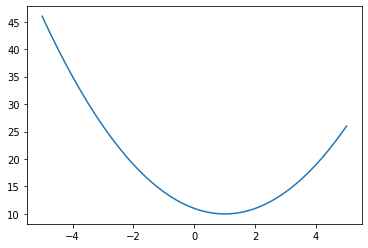

In [5]:
def f(x):
    return (x-1)**2 + 10
xgrid = np.linspace(-5,5,100)
plt.plot(xgrid, f(xgrid))
plt.show()
def grad_f(x):
    return 2*(x-1)

Let's see how gradient descent does?

In [10]:
gd_attempt1(f, grad_f, 0)

(0.9999999999999722, 10.0)

The algorithm spit out an $x$ value that is $\approx 2.8\times 10^{-14}$ away from the correct answer $1$ and gives us the correct minimal value of the cost function $f$.

What happens when the function $f$ is not convex? For example
$$
f(x) = 4(x-1)^2(x+1)^2 - 2(x-1).
$$
Why is this not convex? We'll we could plot it and *see* that it is not convex, by that is not a proof. Let's do this exactly:
First since $(x-1)(x+1) = (x^2-1)$ we can simplify this as
$$
f(x) = 4(x^2-1)^2 - 2(x-1) = 4x^4 - 8x^2 + 4 - 2x + 2 = 4x^4 - 8x^2 -2x+6.
$$
The Hessian (second derivative) of $f$ is
$$
f''(x) = 48 x^2 - 16
$$ which is not always non-negative. Hence the second order condition for convexity tells us that $f$ is not convex.

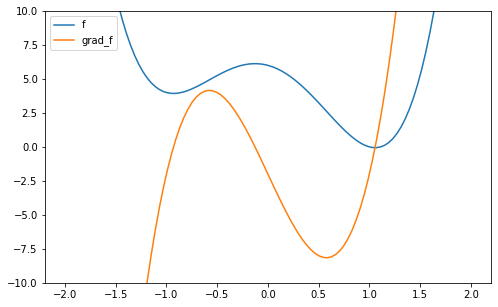

In [15]:
def f(x):
    return 4 * (x-1)**2 * (x+1)**2 - 2*(x-1)
def grad_f(x):
    return 8 * (x-1) * (x+1)**2 + 8 * (x-1)**2 * (x+1) - 2
xgrid = np.linspace(-2,2,100)
plt.figure(figsize = (8,5))
plt.plot(xgrid, f(xgrid), label='f')
plt.plot(xgrid, grad_f(xgrid), label='grad_f')
plt.ylim((-10,10))
plt.legend()
plt.show()

Let's see what gradient descent spits out as the numerical answer for the local minimums?

In [16]:
gd_attempt1(f,grad_f,0)

(1.057453770738375, -0.0590145651028224)

In [17]:
gd_attempt1(f,grad_f,-2)

(-0.9304029265558538, 3.933005966859003)

We see that there are two different answers! One reason for this is that the funciton is not convex, and there are two local minimums. 

## Convergence Analysis

### Smooth case
**Def:** Let $f:\mathbb{R}^d\to \mathbb{R}$ be a twice continuously differentiable function. We say that $f$ is $L$-smooth if 
$$
-LI_{d\times d} \preceq H_f(\mathbf{x})\preceq L I_{d\times d}\qquad\forall\mathbf{x}\in \mathbb{R}^d.
$$
In $d =1$ case this just means that $f''(x)\in[-L,L]$ for all $x$.

The following claim is just a consequence of the definition of $A\preceq B$.

**Claim:** Suppose that $A, B$ are $d\times d$ matrices. Then $A\succeq B$ if and only if for all $\mathbf{x}\in \mathbb{R}^d$
$$
\langle \mathbf{x}, A\mathbf{x}\rangle \le \langle \mathbf{x}, B\mathbf{x}\rangle.
$$
In particular, for $L$-smooth functions $f$ if and only if it is twice-continuously differentiable and 
$$
-L \|\mathbf{p}\|^2 \le \langle \mathbf{p}, H_f(\mathbf{z}) \mathbf{p}\rangle \le L \|\mathbf{p}\|^2\qquad\forall\mathbf{x},\mathbf{p}
$$

**Lemma (Quadratic bound for smooth functions):** Let $f:\mathbb{R}^d\to \mathbb{R}$ be twice continuously differentialbe. Then $f$ is $L$-smooth if and only if for all $\mathbf{x},\mathbf{y}\in \mathbb{R}^d$ it holds that
$$
\left| f(\mathbf{y}) - \Big( f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\mathbf{y}-\mathbf{x})\Big) \right| \le \frac{L}{2} \|\mathbf{y}-\mathbf{x}\|^2.
$$

*Proof:*
We use Taylor's theorem. 
For any $\mathbf{x}$, $\mathbf{p}$ and $\alpha>0$ we can find some $\xi_\alpha$ such that
$$
f(\mathbf{x}+ \alpha \mathbf{p}) = f(\mathbf{x}) + \alpha \nabla f(\mathbf{x})^T \mathbf{p} + \frac{1}{2} \alpha^2 \langle \mathbf{p}, H_f(\mathbf{x}+\xi_\alpha \alpha \mathbf{p} ) \mathbf{p}\rangle.
$$

If we set $\mathbf{p} = \mathbf{y}-\mathbf{x}$ and $\alpha = 1$ then this becomes:
$$
f(\mathbf{y}) -  f(\mathbf{x}) -  \nabla f(\mathbf{x})^T (\mathbf{y}-\mathbf{x}) = \frac{1}{2}  \langle \mathbf{y}-\mathbf{x}, H_f(\mathbf{x}+\xi_1  \mathbf{p} ) (\mathbf{y}-\mathbf{x})\rangle.
$$
And so if we take absolute values on both sides it becomes: 
$$
\left| f(\mathbf{y}) - \Big( f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\mathbf{y}-\mathbf{x})\Big) \right| \le \left|\frac{1}{2}  \langle \mathbf{y}-\mathbf{x}, H_f(\mathbf{x}+\xi_1  \mathbf{p} ) (\mathbf{y}-\mathbf{x})\rangle\right|.
$$
If $H$ is $L$-smooth, then $$ -L \|\mathbf{p}\|^2 \le \langle \mathbf{p}, H_f(\mathbf{z}) \mathbf{p}\rangle \le L \|\mathbf{p}\|^2$$
by the claim above, which means
$$
\left| f(\mathbf{y}) - \Big( f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\mathbf{y}-\mathbf{x})\Big) \right| \le \left|\frac{1}{2}  \langle \mathbf{y}-\mathbf{x}, H_f(\mathbf{x}+\xi_1  \mathbf{p} ) (\mathbf{y}-\mathbf{x})\rangle\right|\le \frac{L}{2}\|\mathbf{y}-\mathbf{x}\|^2
$$ as desired.

To show the reverse implication, we rearrange the equation
$$
f(\mathbf{x}+ \alpha \mathbf{p}) = f(\mathbf{x}) + \alpha \nabla f(\mathbf{x})^T \mathbf{p} + \frac{1}{2} \alpha^2 \langle \mathbf{p}, H_f(\mathbf{x}+\xi_\alpha \alpha \mathbf{p} ) \mathbf{p}\rangle
$$
to get
$$
\left|f(\mathbf{x}+ \alpha \mathbf{p}) -\Big( f(\mathbf{x}) + \alpha \nabla f(\mathbf{x})^T \mathbf{p}\Big)\right| = \frac{1}{2} \alpha^2 \left|\langle \mathbf{p}, H_f(\mathbf{x}+\xi_\alpha \alpha \mathbf{p} ) \mathbf{p}\rangle\right|.
$$ But the left-hand side is bounded by
$$
\left|f(\mathbf{x}+ \alpha \mathbf{p}) -\Big( f(\mathbf{x}) + \alpha \nabla f(\mathbf{x})^T \mathbf{p}\Big)\right|  \le \frac{L}{2} \|\alpha\mathbf{p}\|^2 = \frac{L}{2} \alpha^2 \|\mathbf{p}\|^2.
$$
But then 
$$
\left|\frac{1}{2} \alpha^2 \langle \mathbf{p}, H_f(\mathbf{x}+\xi_\alpha \alpha \mathbf{p} ) \mathbf{p}\rangle \right| \le \frac{L}{2}\alpha^2 \mathbf{p}.
$$ Now cancel the $\alpha^2$'s on both sides and take the limit as $\alpha\to0$ and use the above claim. $\square$.

**Theorem (Convergence of Gradient Descent; smooth case)**
Suppose that $f:\mathbb{R}^d\to \mathbb{R}$ is $L$-smooth and bounded below. That is there is some $\overline{f}> -\infty$ such that $f(\mathbf{x})\ge \overline{f}$ for all $\mathbf{x}$. We assume that $\overline{f} = \inf_{\mathbf{x}} f(\mathbf{x})$.

Then the Gradient Descent algorithm above with $\alpha_t = \alpha = \frac{1}{L}$ for all $t = 0,1,\dotsm$ and any starting point $\mathbf{x}^0$ produces a sequence $\mathbf{x}^t$ that satisfies
$$
f(\mathbf{x}^{t+1})\le f(\mathbf{x}^t)\qquad \forall t
$$
and
$$
\lim_{t\to\infty} \left\| \nabla f(\mathbf{x}^t)\right\| = 0.
$$

Moreover after $S$ many steps of the alorithm, there is some $t \in\{ 0,1,\dotsm, S\}$ such that 
$$
\|\nabla f(\mathbf{x}^t) \| \le \sqrt{\frac{\displaystyle 2L \big( f(\mathbf{x}) - \overline{f}\big) }{S}}.
$$

*Comments* The above Theorem does not tell us that we will converge to the global minimum of the cost function, but only that our cost function always decreases. In fact, we need not converge to a local minimum at all!

We need the following lemma to prove the above theorem.

**Lemma (Descent guarantee, smooth case):**
Suppose that $f:\mathbb{R}^d\to \mathbb{R}$ is $L$-smooth. Then for any $\mathbf{x}\in \mathbb{R}^d$,
$$
f\bigg( \mathbf{x}-\frac{1}{L} \nabla f(\mathbf{x})\bigg) \le f(\mathbf{x}) - \frac{1}{2L} \|\nabla f(\mathbf{x})\|^2.
$$
*Proof of Lemma:*

Let $\mathbf{p} = -\nabla f(\mathbf{x})$. Then by the quadratic bound for smooth functions lemma above we have for all $\alpha>0$
\begin{align*}
f(\mathbf{x}+\alpha \mathbf{p}) &\le f(\mathbf{x}) + \nabla f(\mathbf{x})^T (\alpha\mathbf{p})  + \frac{L}{2} \alpha^2 \|\mathbf{p}\|^2\\
&= f(\mathbf{x}) - \alpha \|\nabla f(\mathbf{x})\|^2 + \alpha^2 \frac{L}{2} \|\nabla f(\mathbf{x})\|^2\\
&= f(\mathbf{x}) + \Big(-\alpha + \alpha^2 \frac{L}{2} \Big) \|\nabla f(\mathbf{x})\|^2.
\end{align*}
Just set $\alpha = \frac{1}{L}$. $\square$

*Proof of Theorem:*
We use the above lemma. First note that by the above lemma that
$$
f(\mathbf{x}^{t}) = f\bigg(\mathbf{x}^{t-1} - \frac{1}{L} \nabla f(\mathbf{x}^{t-1})\bigg) \le f(\mathbf{x}^{t-1}) - \frac{1}{2L }\|f(\mathbf{x}^{t-1})\|^2.
$$
This gives the first inequality. 

But we can get a similar bound for $f(\mathbf{x}^{t-1})$ as well:
$$
f(\mathbf{x}^{t-1}) = f\bigg(\mathbf{x}^{t-2} - \frac{1}{L} \nabla f(\mathbf{x}^{t-2})\bigg) \le f(\mathbf{x}^{t-2}) - \frac{1}{2L }\|f(\mathbf{x}^{t-2})\|^2. 
$$
Continuing this we get for any $t = 0,1,2,\dotsm$
$$
f(\mathbf{x}^t) \le f(\mathbf{x}^0)- \frac{1}{2L} \sum_{s=0}^{t-1} \|\nabla f(\mathbf{x}^s)\|^2.
$$
But now rearranging gives 
$$
\sum_{s = 0}^t \|\nabla f(\mathbf{x}^s)\|^2 \le 2L \left(f(\mathbf{x}^0) - f(\mathbf{x}^{t+1}) \right) \le 2L (f(\mathbf{x}^0) - \overline{f}).
$$
The right-hand side does not depend on $t$ and the left-hand side increases with $t$ and so we can take a limit as $t\to\infty$ to get
$$
\sum_{s = 0}^\infty \|\nabla f(\mathbf{x}^s)\|^2  \le  2L (f(\mathbf{x}^0) - \overline{f})<\infty.
$$
But since this is summable, we must have that $\|\nabla f(\mathbf{x}^s)\|^2 \to0$ as $s\to\infty$. This gives the second statement.

The last bound is as follows: Since
$f(\mathbf{x}^t) \ge \overline{f}$, we get
$$
\frac{1}{2L} \sum_{s=0}^{t-1} \|\nabla f(\mathbf{x}^s)\|^2 \le f(\mathbf{x}^0) - \overline{f}
$$
and by rearranging
$$
 t \min_{s = 0,1\dots, t-1} \|\nabla f(\mathbf{x}^s)\|^2 \le \sum_{s=0}^{t-1} \|\nabla f(\mathbf{x}^s)\|^2 \le 2L \Big(f(\mathbf{x}^0)-\underline{f}\Big).
$$
This means
$$
\min_{s< S} \|\nabla f(\mathbf{x}^s)\| \le \sqrt{\frac{\displaystyle 2L \big( f(\mathbf{x}) - \overline{f}\big) }{S}}
$$ which is the last statement. $\square$

### Strongly convex case:



**Lemma** Suppose that $f:\mathbb{R}^d\to\mathbb{R}$ is twice continuously differentiable and $\rho$-strongly convex for some $\rho>0$. Let $\mathbf{x}^*$ be the unique global minimizer then
$$
f(\mathbf{x}) - f(\mathbf{x}^*) \le \frac{\|\nabla f(\mathbf{x})\|^2}{2\rho}.
$$

*Proof:* Recall that by the quadratic bound for strongly convex functions:
\begin{align*}
f(\mathbf{x}^*) &\ge f(\mathbf{x})+ \nabla f(\mathbf{x})^T (\mathbf{x}^* - \mathbf{x}) + \frac{\rho}{2} \|\mathbf{x}^*-\mathbf{x}\|^2\\
&= f(\mathbf{x})+ \nabla f(\mathbf{x})^T \mathbf{w} + \frac{1}{2} \langle \mathbf{w}, \rho I_{d\times d} \mathbf{w}\rangle 
\end{align*}
where we set $\mathbf{w} = \mathbf{x}^*-\mathbf{x}$.

But we can forget that $\mathbf{w}$ was a particular value above, and instead fix $\mathbf{x}$ adn view the right-most term as just a function of $\mathbf{w}$:
$$
g(\mathbf{w}):= f(\mathbf{x})+ \nabla f(\mathbf{x})^T \mathbf{w} + \frac{1}{2} \langle \mathbf{w}, \rho I_{d\times d} \mathbf{w}\rangle = r + \mathbf{q}^T \mathbf{w} + \frac{1}{2}\langle \mathbf{w}, P\mathbf{w}\rangle
$$ and we know that this is minimized at $\mathbf{w}$ solving:
$$
P\mathbf{w} +\mathbf{q} = \mathbf{0}.
$$ Here we used the fact that $P = \rho I_{d\times d}$ is symmetric.
But then
$$
\mathbf{w}^* =- P^{-1}  \mathbf{q} = -\frac{1}{\rho} \nabla f(\mathbf{x})
$$ is the unique global minimum of our new function and so:
\begin{align*}
f(\mathbf{x}^*) &\ge g(\mathbf{x}^*-\mathbf{x}) \ge g(\mathbf{w}^*) \\
 &= f(\mathbf{x}) + \nabla f(\mathbf{x})^T \left(-\frac{1}{\rho} \nabla f(\mathbf{x})  \right) + \frac{1}{2}\Bigg\langle -\frac{1}{\rho} \nabla f(\mathbf{x}), \rho I_{d\times d}\left( -\frac{1}{\rho}  \nabla f(\mathbf{x}) \right)\Bigg\rangle \\
 &= f(\mathbf{x}) - \frac{1}{2\rho} \|\nabla f(\mathbf{x})\|^2
\end{align*}
and rearranging gives the desired statement. $\square$


**Theorem (Convergence of gradient descent: strongly convex case):**
Suppose that $f:\mathbb{R}^d\to\mathbb{R}$ is $\rho$-strongly convex and $L$-smooth with unique global minimum $\mathbf{x}^*$. Then gradient descent with $\alpha = \frac{1}{L}$ starting from any point $\mathbf{x}^0$ produces a sequence $\mathbf{x}^t$ such that
$$
\lim_{t\to\infty} f(\mathbf{x}^t)  = f(\mathbf{x}^*).
$$
Moreover, this can be quantified:
$$
f(\mathbf{x}^t) - f(\mathbf{x}^*) \le \left(1-\frac{\rho}{L} \right)^t \left( f(\mathbf{x}^0)- f(\mathbf{x}^*)\right).
$$

*Proof:*
We have like the smooth case above
\begin{align*}
f(\mathbf{x}^{t+1})  &= f\Big( \mathbf{x}^t - \frac{1}{L} \nabla f(\mathbf{x}^t) \Big) \le f(\mathbf{x}^t) - \frac{1}{2L} \|\nabla f(\mathbf{x}^t)\|^2\\
&\le f(\mathbf{x}^t) - \frac{\rho}{L}\Big(f(\mathbf{x}^t) - f(\mathbf{x^*})\Big).
\end{align*} The last inequality follows from the preceeding lemma.

Then
\begin{align*}
f(\mathbf{x}^{t+1})- f(\mathbf{x}^*) &\le f(\mathbf{x}^t) - \frac{\rho}{L}\Big(f(\mathbf{x}^t) - f(\mathbf{x^*})\Big) - f(\mathbf{x}^*)\\
&= \left( 1- \frac{\rho}{L}\right) f(\mathbf{x}^{t})- \left( 1- \frac{\rho}{L}\right)f(\mathbf{x}^*)\\
&=\left( 1- \frac{\rho}{L}\right)\Big(f(\mathbf{x}^{t})- f(\mathbf{x}^*)\Big).
\end{align*}
Continuing again
$$
f(\mathbf{x}^{t+1})- f(\mathbf{x}^*) \le \left( 1- \frac{\rho}{L}\right)\Big(f(\mathbf{x}^{t})- f(\mathbf{x}^*)\Big) \le \left( 1- \frac{\rho}{L}\right)^2\Big(f(\mathbf{x}^{t-1})- f(\mathbf{x}^*)\Big)
$$
and so on
$$
f(\mathbf{x}^{t})- f(\mathbf{x}^*)\le \left( 1- \frac{\rho}{L}\right)^t\Big(f(\mathbf{x}^{0})- f(\mathbf{x}^*)\Big).
$$This gives the second claim. This proves the first one as well by taking $t\to\infty$.